# Text Analysis

- **Sentiment Analysis**
    - tokenization
    - stop words
    - stemming
- **TF-IDF**
    - Bag of Words
    - term frequency
    - inverse document frequency
- Tools: `nltk`

In [ ]:
# pandas and matplotlib setup
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)
plt.rcParams.update({'font.size': 14})
import seaborn as sns

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import warnings
warnings.filterwarnings('ignore')

#import natural language toolkit
import nltk

# download stopwords & punkt
nltk.download('stopwords')
nltk.download('punkt')

#### Reminder: **Natural Language Processing** is a whole field of study.

Like most topics in this course, there are many courses solely focused on the appropriate analysis of text. We'll cover the general concepts in this course, but know you're missing lots of important details.

## Natural Language Toolkit (`nltk`)

For more details on using the functionality within this package, check out the [NLTK Book](http://www.nltk.org/book/).

0. Preface
1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. Processing Raw Text
4. Writing Structured Programs
5. Categorizing and Tagging Words 
6. Learning to Classify Text
7. Extracting Information from Text
8. Analyzing Sentence Structure
9. Building Feature Based Grammars
10. Analyzing the Meaning of Sentences 
11. Managing Linguistic Data
12. Afterword: Facing the Language Challenge

[VADER](https://github.com/cjhutto/vaderSentiment) is a particularly helpful tool/lexicon when working with sentiments expressed in social media (tweets, online reviews, etc.)

Its functionality is available through `nltk`, so we'll download the vader lexicon for use later in this notebook.

In [ ]:
# get lexicon we'll be working with today
nltk.download('vader_lexicon') 

## The Data

In [63]:
df_wi21 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Wi21.csv')
df_wi21.head(6)

,enjoyed_most,enjoyed_least
0,I enjoy about learning python. I think learnin...,I really did not enjoy learning ethnic part. A...
1,Mainly being able to explore the field of data...,Since I have to say something I guess it'll be...
2,Coding is funny,PDF lecture notes should be put on Canvas
3,"I enjoy the ease of access to assignments, for...","At first, I felt that the Data Ethics or Data ..."
4,Learning pandas and plots,final project
5,Coding is funny,PDF lecture notes should be put on Canvas


In [64]:
# read in feedback dataset - Fall 2020
df_fa20 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Fa20.csv')
df_fa20.head(6)

,enjoyed_most,enjoyed_least,quiz_number,quiz_questions,a1,a2,proposal
0,"Final project , l always wanted to analyze dat...",Assignment is kind of difficult to me. I never...,The number we've had is about right.,I wish they were more straight from the notes/...,5.0,12.0,3.0
1,I liked learning about Python and Jupyter Note...,"Honestly, I am not a huge fan of remote learni...",The number we've had is about right.,I think they've been fine generally and would ...,2.0,3.0,7.0
2,The group project since I could work with my t...,I'm not familiar with python and panda.,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,5.0
3,I really like the lectures were separated into...,hmmm I feel like I am a little bit lost on how...,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,5.0
4,I've been really enjoying the assignments. The...,Nothing really so far. It's been nice.,The number we've had is about right.,I wish they were more straight from the notes/...,2.0,3.0,2.0
5,The lectures are not boring like other classes.,On the homework’s I have to consistently strug...,There should be a way less.,I wish they were more straight from the notes/...,7.0,5.0,2.0


In [65]:
# read in feedback dataset - Spring 2020
df_sp20 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Sp20.csv')
df_sp20.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,proposal
0,"Learning Pandas, manipulating data is fun",Quizzes aren't helpful,about as difficult,about the same,3.0,3.0
1,The concept of this class,NaN,about as difficult,about the same,4.0,4.0
2,No midterms,Coding aspect,somewhat easier,about the same,6.0,6.0
3,the project,NaN,somewhat easier,somewhat less,1.0,3.0
4,Finding an interesting topic and researching m...,NaN,about as difficult,about the same,1.0,5.0
5,Looking up stuff for the project proposal,NaN,about as difficult,about the same,2.0,4.0


In [66]:
# read in feedback dataset - Winter 2020
df_wi20 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Wi20.csv')
df_wi20.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,a1,a2,a3
0,Guest Lectures,NaN,about as difficult,about the same,1.0,2.0,4.0
1,"Guest speakers, they were very interesting and...",Nothing,somewhat easier,about the same,1.0,2.0,3.0
2,NaN,NaN,somewhat easier,somewhat less,3.0,3.0,4.0
3,NaN,NaN,somewhat easier,somewhat less,0.5,1.0,1.5
4,The discussion is clear and TA is nice.,Some grading for assignments requires regrade ...,way easier,way less,0.5,0.5,0.5
5,Group collaboration,Not much programming direction,about as difficult,about the same,3.0,4.0,8.0


In [67]:
# read in feedback dataset - Spring 2019
df_sp19 = pd.read_csv('https://raw.githubusercontent.com/shanellis/datasets/master/COGS108_feedback_Sp19.csv')
df_sp19.head(6)

,enjoyed_most,enjoyed_least,difficulty,time_spent,section_attendance,helpful_materials
0,"No tests, project based class, optional lectur...","Group projects can be rough, especially the be...",somewhat more difficult,way more,almost every week,"Lecture, Assignments"
1,I enjoy learning how to use pandas through the...,NaN,somewhat easier,about the same,attend occasionally,"Assignments, Group Project"
2,No attendance,NaN,about as difficult,about the same,attend occasionally,"Assignments, Piazza"
3,Topics about how to handle several Python tools,nothing special,somewhat easier,about the same,attend occasionally,"Section - Workbooks, Assignments"
4,I like the assignments. They're fun and have a...,Nothing!,somewhat easier,about the same,do not attend,"Assignments, Group Project, Piazza"
5,NaN,NaN,about as difficult,about the same,attend occasionally,"Lecture, Section - Workbooks, Assignments, Gro..."


## Describe & Explore

We'll quickly describe and explore the data to see what information we have before moving on to Text Analysis.

### Data Considerations

- duplicate responses?
- PIDs for individuals in the class (typos?)
- missingness?
- reflect reality?

In [68]:
# information about rows and columns
print(df_wi21.shape, df_fa20.shape, df_sp19.shape, df_wi20.shape, df_sp20.shape)

(314, 2) (321, 7) (384, 6) (295, 7) (397, 6)


Note: Response Rates
- Spring 2019: 384/826 (46%)
- Winter 2020: 295/444 (66%)
- Spring 2020: 397/475 (84%)
- Fall 2020: 321/447 (72%)
- Winter 2021: 314/438 (72%)

### Missingness

In [69]:
# how many nonresponses
df_wi21.isnull().sum()

enjoyed_most      0
enjoyed_least    10
dtype: int64

In [70]:
# how many nonresponses
df_fa20.isnull().sum()

enjoyed_most      27
enjoyed_least     54
quiz_number        0
quiz_questions     0
a1                 0
a2                 0
proposal           0
dtype: int64

In [71]:
# how many nonresponses
df_sp19.isnull().sum()

enjoyed_most          58
enjoyed_least         78
difficulty             0
time_spent             0
section_attendance     8
helpful_materials      0
dtype: int64

In [72]:
# how many nonresponses
df_wi20.isnull().sum()

enjoyed_most     33
enjoyed_least    64
difficulty        0
time_spent        0
a1                0
a2                0
a3                0
dtype: int64

In [73]:
# how many nonresponses
df_sp20.isnull().sum()

enjoyed_most     23
enjoyed_least    56
difficulty        0
time_spent        0
a1                0
proposal          0
dtype: int64

We see that there are more nonresponses in the `enjoyed_least` category than the `enjoyed_most` category. So, more people left what they enjoyed least blank than they did what they enjoyed most.

#### Previous Quarters

Typically, there are a few people who have what they enjoy least but don't have an enjoy most. We don't have any last quarter...but often these students' feedback is of particular interest to me.

In [74]:
# Fall 2020
check_least = df_fa20[df_fa20['enjoyed_most'].isnull() & df_fa20['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['The PAs are a little bit challenging. I feel that lecture videos do not do a sufficient job in  preparing me for the PA',
 "Doesn't feel like the hw and lectures are solidly connected",
 'The amount of work, pace of the course, and lack of connection between python notebook and lecture videos/notebooks.',
 'The team final project',
 "The quizzes. I feel like sometimes the quiz questions are a bit more advanced from lecture, which can be a good thing, but I don't know to expect it right after just watching the lecture.",
 'I have not really enjoyed having to take a quiz after every lecture video. I personally find having to take 7-10 quizzes a week slightly excessive but I do see the value in taking the quizzes. ']

In [75]:
# Spring 2020
check_least = df_sp20[df_sp20['enjoyed_most'].isnull() & df_sp20['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['The lack of leniency on the video quiz. I understand that the professor is generous enough to give 20 free quiz points, and students really do appreciate it. But I also hope that the professor and TAs know that us students can make a lot of mistakes, especially when it comes to managing our time. Some of us can get carried away with projects and work in other classes that we forget to take the video quizzes. Instead of restricting the quiz right away after the deadline, maybe implement a late penalty for them. This is just a suggestion, I am not in any ways trying to tell the professor and TAs how to do their job. However, I do hope you guys can take this input into account. ',
 "There are too many quiz every week. And even if I watched the video very carefully, there will be some points deducted. We also don't know how to check whether our answer is correct, even if I pass the datahub's previous test, I may still lose points after turning in. This is weird"]

In [76]:
# Winter 2020
check_least = df_wi20[df_wi20['enjoyed_most'].isnull() & df_wi20['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['Seems to include a lot of important topics in data science, but only goes very briefly in every single one of them. Might be the purpose so that students are made aware of the basic concepts of such topics in data science and expected to learn deeper concepts in other concentrated classes. ',
 'I think the tests and the hidden tests from assignments are not exhaustive.']

In [77]:
# Spring 2019
check_least = df_sp19[df_sp19['enjoyed_most'].isnull() & df_sp19['enjoyed_least'].notnull()]
list(check_least['enjoyed_least'])

['assigned groups because I was looking forward to working with my friends',
 'Coding....',
 'The professor focus too much on statistics and spend insufficient time in coding',
 'What I have liked the least of COGS108 is that I have had trouble with the assignments since I came in with a matlab background and not a python background. So basically not knowing the language has been tough. ',
 'Assigned groups. I enrolled in the class with a group of friends under the assumption that we’d get to work together as in previous iterations of the course.',
 'The professor talked a bit fast',
 "I think lectures are not organized and they are extremely confusing. It would help if they were catered in a more content / topic based way. The homeworks are extremely difficult if you don't have python experience ",
 'Not being able to work with friends on the group project. Trying to work with chosen groupmates who do not care about this class.']

Missing data causes a problem in `nltk`, so we either get rid of individuals who didn't respond to both, or we can replace their missing data with 'No response', knowing that this text will be included in the analysis now.

In [78]:
def fill_no_response(df):
    '''replace missing data in enjoyed_most/least series with string No response'''
    
    df['enjoyed_most'] = df['enjoyed_most'].fillna('No response')
    df['enjoyed_least'] = df['enjoyed_least'].fillna('No response')

In [79]:
# fill NAs with string 'No response'
fill_no_response(df_wi21)
fill_no_response(df_fa20)
fill_no_response(df_sp20)
fill_no_response(df_sp19)
fill_no_response(df_wi20)

### Exploratory Plots

These can give us a quick idea of students' thoughts on the course. (I didn't ask these this quarter because I added the open ended question about how you're doing.)

- Time Spent
- (Relative Difficulty)
- (Quiz responses)

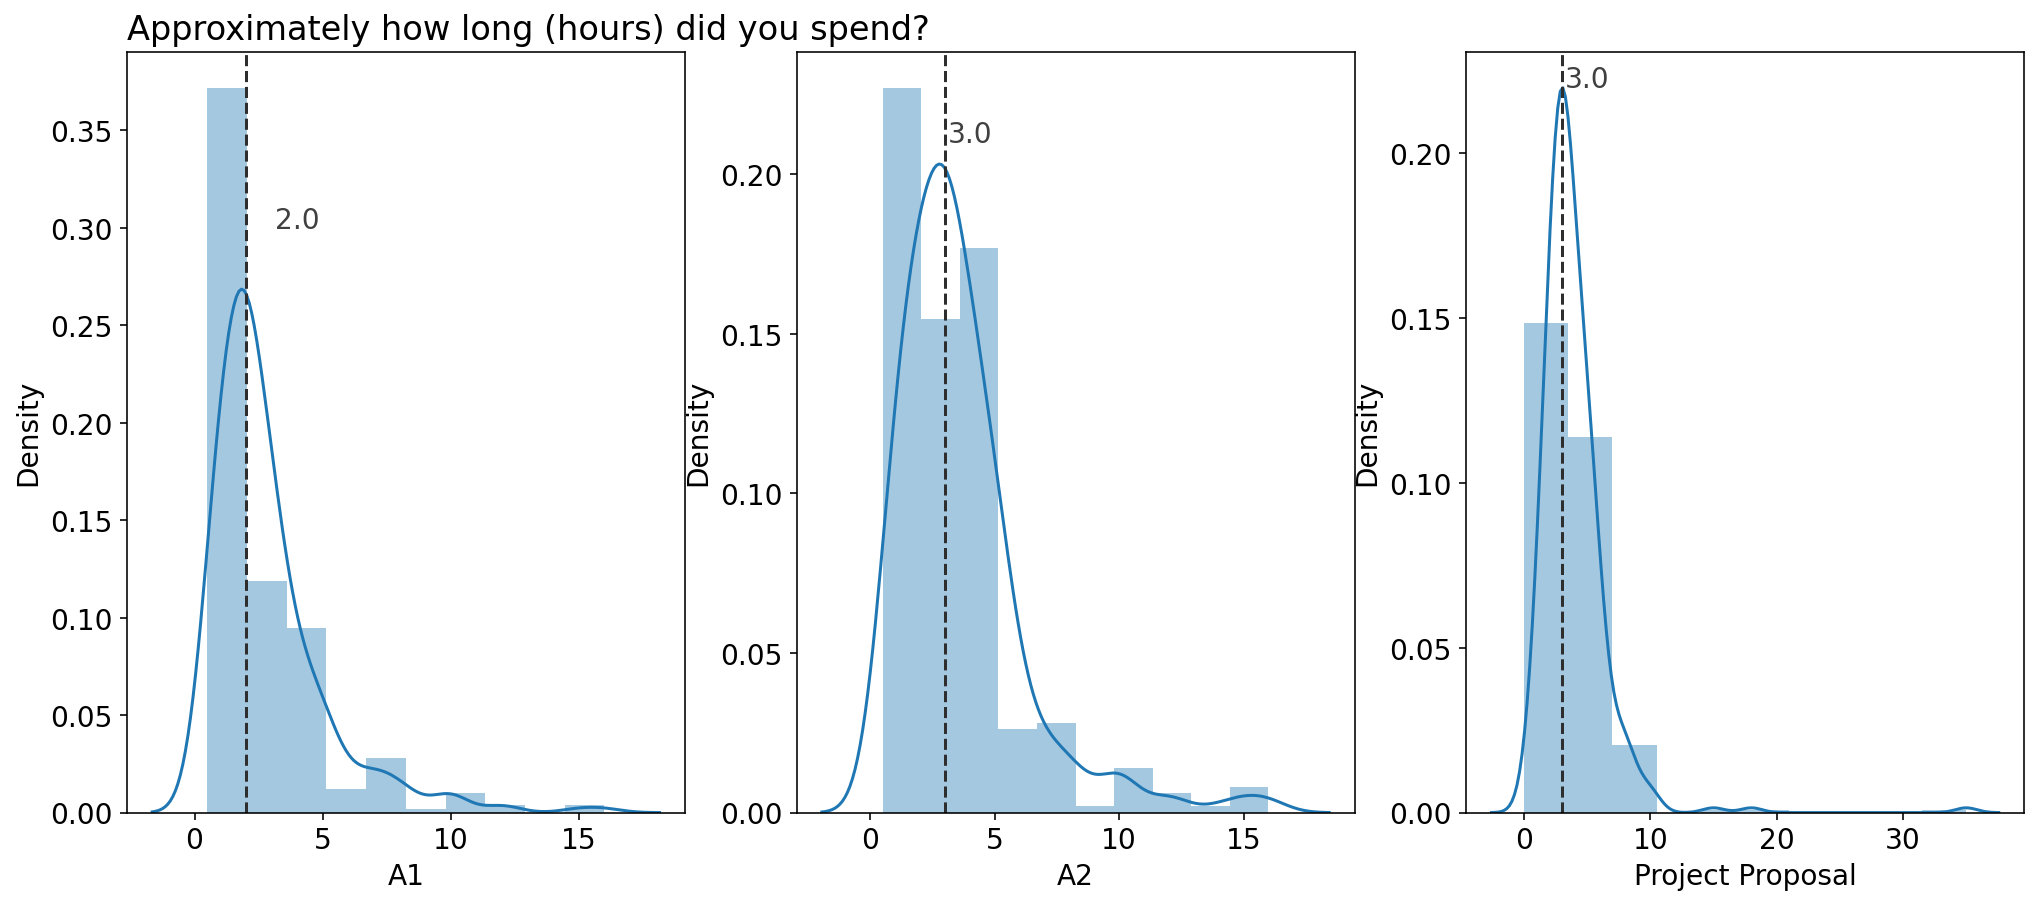

In [80]:
df = df_fa20

plt.subplot(1, 3, 1)
ax = sns.distplot(df['a1'], bins = 10)
ax.axvline(df['a1'].median(), color='#2e2e2e', linestyle='--')
plt.title('Approximately how long (hours) did you spend?', loc='left')
ax.text(x=df['a1'].median()+2, y=0.3, s=df['a1'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('A1')

plt.subplot(1, 3, 2)
ax = sns.distplot(df['a2'], bins = 10)
ax.axvline(df['a2'].median(), color='#2e2e2e', linestyle='--')
ax.text(x=df['a1'].median()+2, y=0.21, s=df['a2'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('A2')

plt.subplot(1, 3, 3)
ax = sns.distplot(df['proposal'], bins = 10)
ax.axvline(df['proposal'].median(), color='#2e2e2e', linestyle='--')
ax.text(x=df['proposal'].median()+2, y=0.22, s=df['proposal'].median(), fontsize=14, alpha=0.75, ha='center')
plt.xlabel('Project Proposal');

## Quick checks: Words of interest



In [ ]:
def check_word_freq(df, word):
    """checks for frequenccy of word specified in most and least enjoyed responses"""
    
    most = df['enjoyed_most'].str.lower().str.contains(word).sum()/df['enjoyed_most'].notnull().sum()
    least = df['enjoyed_least'].str.lower().str.contains(word).sum()/df['enjoyed_least'].notnull().sum()
    
    out = pd.DataFrame({'most_freq': [most], 'least_freq': [least]})
    return out

#### Assignment

In [81]:
## check for assignment
df = df_wi21
check_word_freq(df, 'assignment')

,most_freq,least_freq
0,0.200637,0.219745


#### Project

In [82]:
## check for project in free text
check_word_freq(df, 'project')

,most_freq,least_freq
0,0.159236,0.146497


In [83]:
## check for group in free text
check_word_freq(df, 'group')

,most_freq,least_freq
0,0.101911,0.10828


In [84]:
## check for individual in free text
check_word_freq(df, 'individual')

,most_freq,least_freq
0,0.0,0.003185


#### Quizzes

In [85]:
check_word_freq(df_wi21, 'quiz')

,most_freq,least_freq
0,0.0,0.089172


In [86]:
check_word_freq(df_fa20, 'quiz')

,most_freq,least_freq
0,0.065421,0.302181


In [87]:
check_word_freq(df_sp20, 'quiz')

,most_freq,least_freq
0,0.06801,0.36272


In [88]:
check_word_freq(df_wi20, 'quiz')

,most_freq,least_freq
0,0.016949,0.061017


In [89]:
check_word_freq(df_sp19, 'quiz')

,most_freq,least_freq
0,0.0,0.0


#### Labs

In [90]:
check_word_freq(df_wi21, 'lab')

,most_freq,least_freq
0,0.06051,0.076433


In [91]:
check_word_freq(df_fa20, 'lab')

,most_freq,least_freq
0,0.009346,0.006231


## Sentiment Analysis

We get a quick snapshot of what's going on in COGS 108, but we really want to understand the details. To do this, analyzing the sentiment of the text is a good next step.

#### Step 1: Tokenization

Tokenization is the first step in analyzing text. 

1. Aquire text of interest
2. Break text down (tokenize) into smaller chunks (i.e. words, bigrams, sentences, etc.)

A **token** is a single entity - think of it as a building block of language.

### Tokenization Example

Here we demonstrate what a tokenized single response looks like.

In [92]:
## import word tokenizer
from nltk.tokenize import word_tokenize

In [93]:
# just focus on last quarter's responses
df = df_wi21

In [94]:
tokenized_word = word_tokenize(df.loc[25,'enjoyed_most'])
print(tokenized_word)

['the', 'discussions', 'and', 'hw']


In [95]:
df.loc[25,'enjoyed_most']

'the discussions and hw'

#### Tokenize COGS108 data

Using that concept we'll tokenize the words in the enjoyed_most and `enjoyed_least` columns for the data in our COGS108 data.

In [96]:
# tokenize most and least responses
df['most_token'] = df['enjoyed_most'].apply(word_tokenize) 
df['least_token'] = df['enjoyed_least'].apply(word_tokenize) 
df.head()

,enjoyed_most,enjoyed_least,most_token,least_token
0,I enjoy about learning python. I think learnin...,I really did not enjoy learning ethnic part. A...,"[I, enjoy, about, learning, python, ., I, thin...","[I, really, did, not, enjoy, learning, ethnic,..."
1,Mainly being able to explore the field of data...,Since I have to say something I guess it'll be...,"[Mainly, being, able, to, explore, the, field,...","[Since, I, have, to, say, something, I, guess,..."
2,Coding is funny,PDF lecture notes should be put on Canvas,"[Coding, is, funny]","[PDF, lecture, notes, should, be, put, on, Can..."
3,"I enjoy the ease of access to assignments, for...","At first, I felt that the Data Ethics or Data ...","[I, enjoy, the, ease, of, access, to, assignme...","[At, first, ,, I, felt, that, the, Data, Ethic..."
4,Learning pandas and plots,final project,"[Learning, pandas, and, plots]","[final, project]"


#### Step 2: Stop Words

**Stop words** are words that are of less interest to your analysis. 

For example, you wouldn't expect the following words to be important: is, am, are, this, a, an, the, etc.

By removing stopwords, you can lower the computational burden, focusing on only the words of interest.

To do so in `nltk`, you need to create a list of stopwords and filter them from your tokens.


In [97]:
# import stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# look at stop words
print(stop_words)

{'my', 'her', 'themselves', 'as', 'an', 'yourself', 'have', 'you', 'had', "you're", 'will', 'and', 'couldn', 'over', 'ourselves', 'what', 'once', 'its', 'in', 'd', 'if', 'with', "hadn't", 'isn', 'some', 'further', 'this', 'a', 'shan', 'hers', 'from', 'all', 'that', "wouldn't", 'has', "aren't", 'when', 're', 'only', 'can', 'these', 'on', 'been', 'should', 'he', 'himself', "weren't", "should've", 'very', 'does', 'aren', "won't", 'wasn', 'myself', 'yourselves', 'which', "that'll", 'ain', 's', "didn't", "shan't", 'before', 'whom', "mustn't", "don't", 'wouldn', 'more', 'am', 'was', 'by', 'here', 'up', 'but', 'than', "hasn't", 'be', 'did', 'each', 'during', 'hasn', "needn't", "it's", 'me', 't', 'between', 'few', 'them', 'your', "doesn't", 'theirs', 'doesn', 'being', 'out', 'is', 'down', 'their', 'it', 'hadn', 'there', 'm', 'after', 'needn', 'll', 'below', 'yours', 'then', 'same', 'ours', "you've", 'o', "you'll", 'for', 've', 'any', 'nor', 'won', 'she', 'herself', 'didn', 'into', 'until', "ha

### Stop Words Example

Here we compare a sentence after tokenization to one that has been tokenized _and had stop words removed_.

In [98]:
# example of removing stop words
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:", tokenized_word)
print("Filtered Sentence:", filtered_sent)

Tokenized Sentence: ['the', 'discussions', 'and', 'hw']
Filtered Sentence: ['discussions', 'hw']


#### Remove Stop Words: COGS108 data

Using that idea, we can go ahead and remove stop words from our tokenized most and least liked tokenized data.

In [99]:
# remove stop words
df['most_stop'] = df['most_token'].apply(lambda x: [item for item in x if item not in stop_words])
df['least_stop'] = df['least_token'].apply(lambda x: [item for item in x if item not in stop_words])
df.head()

,enjoyed_most,enjoyed_least,most_token,least_token,most_stop,least_stop
0,I enjoy about learning python. I think learnin...,I really did not enjoy learning ethnic part. A...,"[I, enjoy, about, learning, python, ., I, thin...","[I, really, did, not, enjoy, learning, ethnic,...","[I, enjoy, learning, python, ., I, think, lear...","[I, really, enjoy, learning, ethnic, part, ., ..."
1,Mainly being able to explore the field of data...,Since I have to say something I guess it'll be...,"[Mainly, being, able, to, explore, the, field,...","[Since, I, have, to, say, something, I, guess,...","[Mainly, able, explore, field, data, science, ...","[Since, I, say, something, I, guess, 'll, litt..."
2,Coding is funny,PDF lecture notes should be put on Canvas,"[Coding, is, funny]","[PDF, lecture, notes, should, be, put, on, Can...","[Coding, funny]","[PDF, lecture, notes, put, Canvas]"
3,"I enjoy the ease of access to assignments, for...","At first, I felt that the Data Ethics or Data ...","[I, enjoy, the, ease, of, access, to, assignme...","[At, first, ,, I, felt, that, the, Data, Ethic...","[I, enjoy, ease, access, assignments, ,, insta...","[At, first, ,, I, felt, Data, Ethics, Data, Pr..."
4,Learning pandas and plots,final project,"[Learning, pandas, and, plots]","[final, project]","[Learning, pandas, plots]","[final, project]"


#### Step 3: Lexicon Normalization (**Stemming**)

In language, many different words come from the same root word. 

For example, "intersection", "intersecting", "intersects", and "intersected" are all related to the common root word - "intersect".

**Stemming** is how linguistic normalization occurs - it reduces words to their root words (and chops off additional things like 'ing') - all of the above words would be reduced to their common stem "intersect."






### Stemming Example

After tokenization and removing stop words, we can get the stem for all tokens (words) in our dataset.

In [100]:
# Stemming
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:", filtered_sent)
print("Stemmed Sentence:", stemmed_words)

Filtered Sentence: ['discussions', 'hw']
Stemmed Sentence: ['discuss', 'hw']


#### Stemming: COGS108 data

Here, we obtain the stem (root word) for all tokens in our dataset.

In [101]:
df['most_stem'] = df['most_stop'].apply(lambda x: [ps.stem(y) for y in x])
df['least_stem'] = df['least_stop'].apply(lambda x: [ps.stem(y) for y in x])
df.head()

,enjoyed_most,enjoyed_least,most_token,least_token,most_stop,least_stop,most_stem,least_stem
0,I enjoy about learning python. I think learnin...,I really did not enjoy learning ethnic part. A...,"[I, enjoy, about, learning, python, ., I, thin...","[I, really, did, not, enjoy, learning, ethnic,...","[I, enjoy, learning, python, ., I, think, lear...","[I, really, enjoy, learning, ethnic, part, ., ...","[i, enjoy, learn, python, ., i, think, learn, ...","[i, realli, enjoy, learn, ethnic, part, ., alt..."
1,Mainly being able to explore the field of data...,Since I have to say something I guess it'll be...,"[Mainly, being, able, to, explore, the, field,...","[Since, I, have, to, say, something, I, guess,...","[Mainly, able, explore, field, data, science, ...","[Since, I, say, something, I, guess, 'll, litt...","[mainli, abl, explor, field, data, scienc, too...","[sinc, i, say, someth, i, guess, 'll, littl, c..."
2,Coding is funny,PDF lecture notes should be put on Canvas,"[Coding, is, funny]","[PDF, lecture, notes, should, be, put, on, Can...","[Coding, funny]","[PDF, lecture, notes, put, Canvas]","[code, funni]","[pdf, lectur, note, put, canva]"
3,"I enjoy the ease of access to assignments, for...","At first, I felt that the Data Ethics or Data ...","[I, enjoy, the, ease, of, access, to, assignme...","[At, first, ,, I, felt, that, the, Data, Ethic...","[I, enjoy, ease, access, assignments, ,, insta...","[At, first, ,, I, felt, Data, Ethics, Data, Pr...","[i, enjoy, eas, access, assign, ,, instanc, ,,...","[at, first, ,, i, felt, data, ethic, data, pri..."
4,Learning pandas and plots,final project,"[Learning, pandas, and, plots]","[final, project]","[Learning, pandas, plots]","[final, project]","[learn, panda, plot]","[final, project]"


#### Step 4: Frequency Distribution

It can be helpful to get a sense of which words are most frequent in our dataset.

In [102]:
# get series of all most and least liked words after stemming
# note that "No Response" is still being included in the analysis
most = df['most_stem'].apply(pd.Series).stack()
least = df['least_stem'].apply(pd.Series).stack()

`FreqDist` calculates the frequency of each word in the text and we can plot the most frequent words.

In [103]:
from nltk.probability import FreqDist
import string

# calculation word frequency
fdist_most = FreqDist(most)
fdist_least = FreqDist(least)

# remove punctuation counts
for punc in string.punctuation:
    del fdist_most[punc]
    del fdist_least[punc]

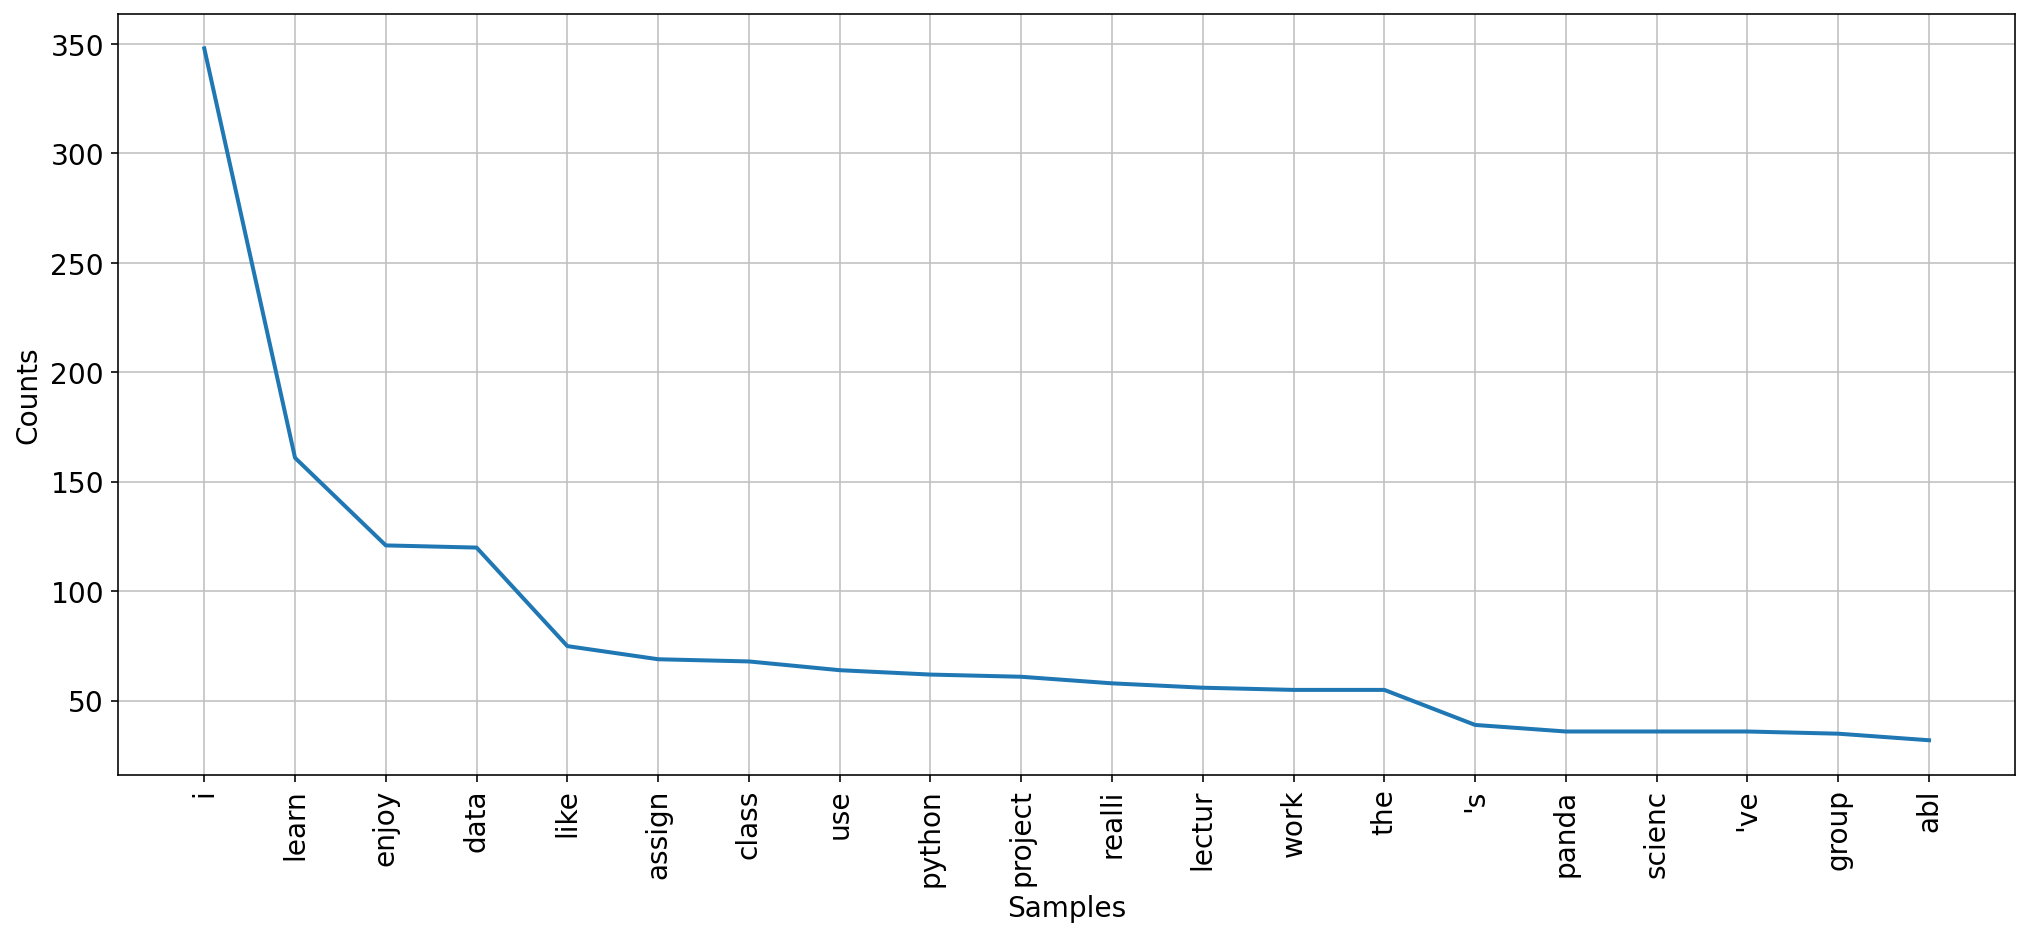

In [104]:
# Frequency Distribution Plot - top 20
# for words in what students like most
fdist_most.plot(20, cumulative=False);

#### Step 5: Sentiment Analysis!

**Sentiment Analysis** quantifies the content, idea, beliefs and opinions conveyed in text. 

Two general approaches:

1. **Lexicon-based** - count number of words in a text belonging to each sentiment (positive, negative, happy, angry, etc.)
2. **Machine learning-based** - develop a classification model on pre-labeled data



### Sentiment Example

To get a measure of overall sentiment in our text, we'll compare our text to the VADER lexicon.

In [105]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
analyser = SentimentIntensityAnalyzer()

VADER handles:

- capitalization (great vs GREAT) & punctuation (exclamation makes more positive!)
- emojis and emoticons
- degree modifiers (extremely good vs. marginally good)
- contractions and conjunctions (but signals shift)

`pos` + `neg` + `neu` = 1

**`compound`** score - metric that calculates sum of all the lexicon ratings and normalizes between -1 (most extreme negative) and +1 (most extreme positive)
- positive: `compound` >= 0.05 
- neutral: -0.05 < `compound` < 0.05
- negative : `compound` <= -0.05

In [106]:
analyser.polarity_scores("The class is super cool.")

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}

In [107]:
analyser.polarity_scores("The class is not super cool.")

{'neg': 0.561, 'neu': 0.439, 'pos': 0.0, 'compound': -0.6259}

In [108]:
analyser.polarity_scores("The class is NOT super cool!")

{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.6597}

#### Sentiment Analysis: COGS108 data

Here, we will calculate the sentiment of each most liked and least liked student response from the survey.

In [109]:
# get list of the 'sentences' (responses) from each individual
most_list = list(df['enjoyed_most'].values)
least_list = list(df['enjoyed_least'].values)

In [110]:
# create function that will output dataframe 
# that stores sentiment information
def get_sentiments(input_list):
    
    output = pd.DataFrame()

    for sentence in input_list:
        ss = analyser.polarity_scores(sentence)
        ss['sentence'] = sentence
        output = output.append(ss, ignore_index=True)

    return output

In [111]:
# get sentiment measures
least_sentiments = get_sentiments(least_list)
most_sentiments = get_sentiments(most_list)

#### Sentiment Analysis: COGS108 data output

After calculating the sentiment of each response, we can look at the output of each.

In [112]:
# take a look at the output
least_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,0.7011,0.135,0.589,0.277,I really did not enjoy learning ethnic part. A...
1,-0.1548,0.043,0.957,0.000,Since I have to say something I guess it'll be...
2,0.0000,0.000,1.000,0.000,PDF lecture notes should be put on Canvas
3,-0.5588,0.111,0.889,0.000,"At first, I felt that the Data Ethics or Data ..."
4,0.0000,0.000,1.000,0.000,final project
5,0.0000,0.000,1.000,0.000,PDF lecture notes should be put on Canvas
6,-0.2960,0.688,0.312,0.000,No response
7,0.4782,0.000,0.876,0.124,"The pace, but I understand this is an introduc..."
8,-0.1027,0.318,0.682,0.000,Discussion questions being vague
9,0.0258,0.121,0.754,0.126,The difficulty of some packages such as pandas...


In [113]:
# take a look at the output
most_sentiments.head(10)

,compound,neg,neu,pos,sentence
0,0.8977,0.000,0.686,0.314,I enjoy about learning python. I think learnin...
1,0.4523,0.037,0.872,0.091,Mainly being able to explore the field of data...
2,0.4404,0.000,0.408,0.592,Coding is funny
3,0.6908,0.000,0.759,0.241,"I enjoy the ease of access to assignments, for..."
4,0.0000,0.000,1.000,0.000,Learning pandas and plots
5,0.4404,0.000,0.408,0.592,Coding is funny
6,0.4939,0.000,0.738,0.262,Hand on experience and discussion about pandas...
7,0.7184,0.000,0.625,0.375,I have enjoyed the case studies learning about...
8,0.0000,0.000,1.000,0.000,Juypter Notebook
9,0.0000,0.000,1.000,0.000,Applying skills from COGS18 to real-world scen...


#### Let's deal with those `No response` values

We've left them in there long enough. Let's remove the 'No response' values before we look at any overall patterns.

In [ ]:
most_sentiments = most_sentiments[most_sentiments['sentence'] != 'No response']
least_sentiments = least_sentiments[least_sentiments['sentence'] != 'No response']

#### Sentiment Analysis: COGS108 data - `describe`

To get an overall sense of the values stored in each of these dataframes, we can use `describe`.

In [ ]:
most_sentiments.describe()

In [ ]:
least_sentiments.describe()

#### Sentiment Analysis: COGS108 data - plotting

We can compare the distribution of the `compound` metric between the two analyses.

In [ ]:
most_sentiments['compound'].plot.density(label='most')
least_sentiments['compound'].plot.density(label='least')
plt.legend()
plt.xlabel('Compound Sentiment Scores')
plt.xlim(-1,1);

In [ ]:
# include label for boxplot
most_sentiments['which'] = 'most'
least_sentiments['which'] = 'least'
# concatenate data frames together
compound_out = pd.concat([most_sentiments, least_sentiments])
compound_out.head()

In [ ]:
# plot compound by resonse type
sns.boxplot(data=compound_out, x='which', y='compound')
plt.xlabel('response');

Probably unsurprisingly, the overall sentiment of what students like tends to be more positive than what students like less. 

Probably not surprising given the data and question on the survey. But, let's dig deeper into these data moving beyond sentiment analysis...

## TF-IDF

Term Frequency - Inverse Document Frequency (**TF-IDF**) sets out to identify the tokens most unique to your document of interest (relative to all documents in your corpus). 

**Term Frequency (TF)** - counts the number of words (tokens) occurring in each document.

**Inverse Document Frequency (IDF)** - weights the word by their relative frequency across documents. 

$$IDF_{word} = log(\frac{\# documents}{\# \ documents\_containing\_word})$$

$$TF-IDF = TF \times IDF$$

words with a high TF-IDF are those with high frequency in one document & relatively low frequency in other documents

For our purposes, our **corpus** will be students' responses to what they like most and least about COGS108.

We'll treat this as **two separate documents**:
1. What students like most
2. What students like least

### Bag of Words (BoW) approach

Converts the text into a co-occurrence matrix across documents within the corpus.

To do this, let's get our text ready.

We're going to make sure all our words are lower case, remove punctuation from each, and then provide the text (`corpus`) to `TfidfVectorizer`.

In [114]:
import string 

# lowercase text
least = list(map(str.lower, least_list))
most = list(map(str.lower, most_list))

# remove punctuation
for c in string.punctuation:
    least = str(least).replace(c, "")
    most = str(most).replace(c, "")

# get list of two documents together
corpus = [str(least), str(most)]

### Calculate TF-IDF

With our text ready for analysis, it's time to calculate TF-IDF

To start our TF-IDF analysis, we'll first **create a `TfidfVectorizer` object to transform our text data into vectors.**

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
TfidfVectorizer?

In [117]:
# create vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True,
                        analyzer='word',
                        max_features=2000,
                        tokenizer=word_tokenize,
                        stop_words=stop_words)

#### TF-IDF: COGS108 data - calculation

Here, we use our vectorizer to calculate TF-IDF across the words in our word matrix.

In [118]:
# calculate TF-IDF
cogs_tfidf = pd.DataFrame(tfidf.fit_transform(corpus).toarray())
cogs_tfidf.columns = tfidf.get_feature_names()
cogs_tfidf = cogs_tfidf.rename(index={0:'least', 1:'most'})

In [120]:
cogs_tfidf.T

,least,most
1,0.045660,0.000000
108,0.046259,0.049685
11,0.000000,0.021144
15,0.019134,0.000000
18,0.032487,0.035900
...,...,...
zone,0.049929,0.000000
zones,0.019134,0.000000
zoom,0.000000,0.035801
—,0.019134,0.000000


#### TF-IDF: COGS108 data - output

If we just want to look at the word most uniuqe in each document...

In [121]:
most_unique = cogs_tfidf.idxmax(axis=1) 
most_unique

least    hard
most     data
dtype: object

Alternatively, we can sort by the set or words most unique to each document:

In [122]:
cogs_tfidf.sort_values(by='most', axis=1, ascending=False)

,data,learning,enjoyed,like,python,really,assignments,class,project,lectures,...,assured,meetings,meets,melting,assuming,memorization,memorize,mental,mentioned,1
least,0.058484,0.052186,0.028571,0.073100,0.056880,0.063490,0.070019,0.066598,0.067142,0.054398,...,0.019134,0.019134,0.019134,0.019134,0.019134,0.019134,0.032397,0.019134,0.040155,0.04566
most,0.087069,0.085760,0.079796,0.077846,0.077135,0.076131,0.076131,0.074196,0.073594,0.070541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [123]:
cogs_tfidf.sort_values(by='least', axis=1, ascending=False)

,hard,least,quizzes,like,assignments,discussion,d3,project,class,time,...,seeing,interestingchallenging,interests,internships,seabron,seabornmatplotlibpandas,seaborne,interviewing,screens,assignmentslabs
least,0.09019,0.088226,0.081475,0.073100,0.070019,0.070019,0.068212,0.067142,0.066598,0.065737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
most,0.00000,0.000000,0.000000,0.077846,0.076131,0.060847,0.000000,0.073594,0.074196,0.057668,...,0.050457,0.021144,0.021144,0.021144,0.021144,0.021144,0.021144,0.021144,0.021144,0.021144


**Sentiment Analysis** and **TF-IDF** are really helpful when analyzing documents and corpuses of text.

But, what if, from the text itself we wanted to predict whether or not the text was likely a 'most' liked or a 'least' liked comment? We'll discuss how to do this in the coming **machine learning** lectures!